# Other Data Types
In this lecture we will show how we can handle different data types in Python. Pandas will be a huge help for us during this lecture and following exercises. We will cover following topics:
- Excel
- JSON
- XML
- Images
- HTML

## Excel

In [ ]:
import pandas as pd

In [ ]:
excel_file = 'data/movies.xls'
movies = pd.read_excel(excel_file)

In [ ]:
movies.head()

In [ ]:
# we can specify what sheet we want
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
movies_sheet1.head()

In [ ]:
# if we want second sheet
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
movies_sheet2.head()

In [ ]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)
movies_sheet3.head()

In [ ]:
# concatenate 3 sheets into 1 dataframe
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

In [ ]:
print(movies.Year.min())
print(movies.Year.max())

In [ ]:
# do it all at once:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
movies = pd.concat(movies_sheets)

In [ ]:
movies.shape

In [ ]:
print(movies.Year.min())
print(movies.Year.max())

#### Analysis

In [ ]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)
sorted_by_gross[['Title','Gross Earnings']]

In [ ]:
earnings_by_co_lang = (movies[['Country', 'Language', 'Gross Earnings']]
                       .pivot_table(index=['Country', 'Language'])
                       .unstack()
                       .fillna(0))

earnings_by_co_lang.head()

In [ ]:
# Export Back to Excel
movies.to_excel('data/all_movies.xlsx', index=False)

## JSON

In [ ]:
# generate JSON
import json

# Creating a Python Dictionary
data = {"Sub_ID":["1","2","3","4","5","6","7","8" ],
        "Name":["Erik", "Daniel", "Michael", "Sven",
                "Gary", "Carol","Lisa", "Elisabeth" ],
        "Salary":["723.3", "515.2", "621", "731", 
                  "844.15","558", "642.8", "732.5" ],
        "StartDate":[ "1/1/2011", "7/23/2013", "12/15/2011",
                     "6/11/2013", "3/27/2011","5/21/2012", 
                     "7/30/2013", "6/17/2014"],
        "Department":[ "IT", "Manegement", "IT", "HR", 
                      "Finance", "IT", "Manegement", "IT"],
        "Sex":[ "M", "M", "M", 
              "M", "M", "F", "F", "F"]}

print(data)

In [ ]:
print(type(data))

In [ ]:
# saving from python to JSON file
import json

# Parse JSON
with open('data/data.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
# Python Parsing JSON 
with open('data/data.json') as json_file:
    data = json.load(json_file)

print(data)

#### Pandas

In [ ]:
import pandas as pd

# Read JSON as a dataframe with Pandas:
df = pd.read_json('data/data.json')
df

In [ ]:
# now we can store as excel/csv
df.to_csv("data/data.csv", index=False)

In [ ]:
url = "https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json"
first_json = pd.read_json(url)
first_json.head()

In [ ]:
first_json.to_json('data/json_columns.json', orient="columns")
first_json.to_json('data/json_index.json', orient="index")

In [ ]:
# I can use to_json and read_json only with simple JSON. 
# All arrays inside need to have arrays of same length.
df = pd.read_json("data/nested.json")

In [ ]:
import json
#load json object
with open('data/nested.json') as f:
    nested_json = json.load(f)
print(nested_json)
print(type(nested_json))

In [ ]:
# we can use package pprint to print the dict nicely
import pprint

In [ ]:
pprint.pprint(nested_json)

In [ ]:
# pandas has also tool to work with nested json
pd.json_normalize(nested_json)

We can see from above that the primary keys are the columns of the DataFrame. We were able to load it as a Pandas DataFrame but it still looks weird.

In [ ]:
blog = pd.json_normalize(nested_json,record_path ='blog')
blog.head()

In [ ]:
blog = pd.json_normalize(nested_json,record_path ='article')
blog.head()

#### Once more

In [ ]:
# define json string
data = [{"state": "Florida", 
        "shortname": "FL",
        "info": {"governor": "Rick Scott"},
        "counties": [{"name": "Dade", "population": 12345},
                     {"name": "Broward", "population": 40000},
                     {"name": "Palm Beach", "population": 60000}]},
       {"state": "Ohio",
        "shortname": "OH",
        "info": {"governor": "John Kasich"},
        "counties": [{"name": "Summit", "population": 1234},
                     {"name": "Cuyahoga", "population": 1337}]}]

In [ ]:
pd.json_normalize(data)

In [ ]:
pd.json_normalize(data=data, record_path='counties', meta=['state', 'shortname', ['info', 'governor']])

## XML

In [ ]:
# install package (you can install package in jupyter by '!')
# !pip install xmltodict

In [ ]:
# import package
import xmltodict

In [ ]:
# open a file and convert to a dictionary
with open("./data/data.xml") as xml_file:
    data_dict = xmltodict.parse(xml_file.read())

In [ ]:
data_dict

In [ ]:
# check the length
len(data_dict)

In [ ]:
# print keys
data_dict.keys()

In [ ]:
data = data_dict['data']
data

In [ ]:
len(data)

In [ ]:
# print keys
data.keys()

In [ ]:
data['country']

In [ ]:
len(data['country'])

In [ ]:
# create dataframe 
df = pd.DataFrame(data['country'])
df

In [ ]:
pd.json_normalize(data, record_path = 'neighbor')

In [ ]:
type(data['country'][1]['neighbor'])

In [ ]:
data['country'][1]['neighbor'] = [data['country'][1]['neighbor']]

In [ ]:
type(data['country'][1]['neighbor'])

In [ ]:
data['country']

In [ ]:
pd.json_normalize(data['country'], 
                  record_path = 'neighbor', 
                  meta=['@name','rank','year','gdppc'],
                  record_prefix='neighbor_'
                 )

## Text

In [ ]:
text_file = open("data/text.txt", "r")

In [ ]:
text_file

In [ ]:
text_file.read()

In [ ]:
### Run it again:

In [ ]:
text_file.read()

> #### Warning
> When you say `read` on a file object, you actually move the file pointer to the end and hence your next calls to `read` would return empty.

You need to store the results into the variable

In [ ]:
text_file = open("data/text.txt", "r")
text = text_file.read()

We can also read the first line only

In [ ]:
text_file = open("data/text.txt", "r")
text_file.readline()

In [ ]:
### Run it twice more:

In [ ]:
text_file.readline()

In [ ]:
text_file.readline()

> #### Note
> After reading first line the file pointer was at the beginning of the second line. Our file consists of 2 lines therefore afte the load of second, the pointer was at the end the next read returned nothing.

In [ ]:
### Load the lines into list
text_file = open("data/text.txt", "r")
text = text_file.readlines()

In [ ]:
type(text)

## Images

In [1]:
# pip install pillow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the image from the file
myImage = Image.open("./flower_square.jpg");
myImage_BW = myImage.convert('LA')
# myImage = Image.open("<your picture>");

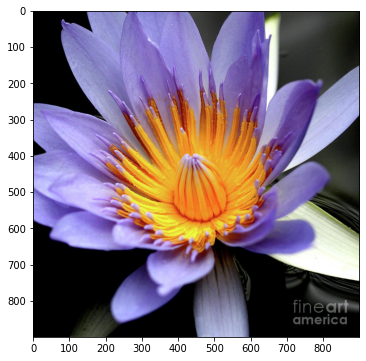

In [3]:
plt.figure(figsize=(9, 6))
plt.imshow(myImage);
# myImage

In [4]:
# convert the image into the matrix
imgmat = np.array(myImage)

In [10]:
# imgmat

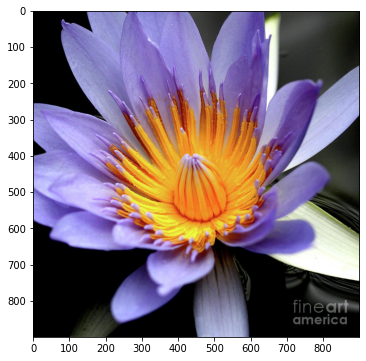

In [8]:
plt.figure(figsize=(9,6))
plt.imshow(imgmat)

In [11]:
type(myImage)

PIL.JpegImagePlugin.JpegImageFile

In [12]:
type(imgmat)

numpy.ndarray

In [ ]:
imgmat.shape

## HTML

In [ ]:
import pandas as pd
import requests

We will work with the URL https://www.worldcoinindex.com/.

In [ ]:
url = 'https://www.worldcoinindex.com/'
crypto_url = requests.get(url)
crypto_url

In [ ]:
body = crypto_url.text

In [ ]:
# let's see what can pandas do about it:
crypto_data = pd.read_html(body)
print(type(crypto_data))
print(len(crypto_data))

In [ ]:
crypto_data = crypto_data[0]
crypto_data.head()

In [ ]:
# data types are not correct unfortunately
crypto_data.dtypes

**What if there is no table in HTML?**

If we want to extract information from HTML, which doesn't have a table, we need to use a different approach: Scraping. Fortunately, Python has a great package for this called Beautiful Soup.